# ✅ Exercise 1: 보상이 비슷할 때 Softmax vs Epsilon-Greedy

<실험 목적>

팔(arms)들의 평균 보상이 모두 비슷할 때 Softmax와 Epsilon-Greedy 알고리즘이 어떻게 다르게 행동하는지 비교한다.

<실험 조건>

Arms: [0.1, 0.1, 0.1, 0.1, 0.12]

<알고리즘>:

Epsilon-Greedy: ε = 0.1, 0.01

Softmax: Temperature = 0.1, 0.3, 0.5

Horizon: 200

Simulation: 1회 실행

<코드 설명>

EpsilonGreedy: ε의 확률로 무작위 탐색을 수행하고, 1-ε 확률로 현재 가장 높은 가치를 가진 arm을 선택

Softmax: 각 arm의 value를 확률적으로 정규화하여 선택. temperature가 낮으면 greedy에 가까워지고, 높으면 탐색적이 된다.

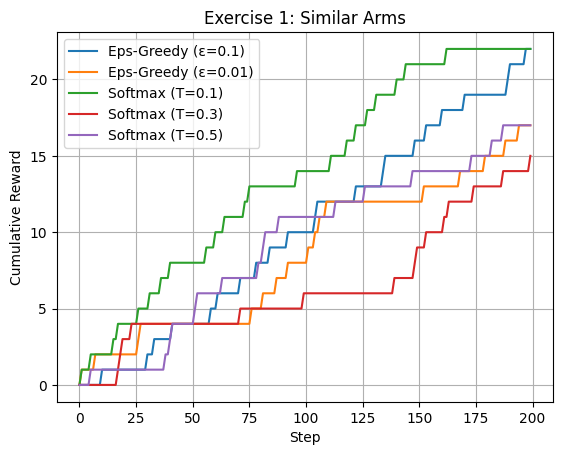

(<matplotlib.legend.Legend at 0x7ea04bb03cd0>, None, None)

In [1]:
import math, random, numpy as np, matplotlib.pyplot as plt

# --- 클래스 정의 ---
class BernoulliArm:
    def __init__(self, p): self.p = p
    def draw(self): return 1 if random.random() < self.p else 0

class EpsilonGreedy:
    def __init__(self, epsilon): self.epsilon = epsilon
    def initialize(self, n_arms):
        self.counts, self.values = [0]*n_arms, [0.0]*n_arms
    def select_arm(self):
        return self.values.index(max(self.values)) if random.random() > self.epsilon else random.randrange(len(self.values))
    def update(self, arm, reward):
        self.counts[arm] += 1
        n, value = self.counts[arm], self.values[arm]
        self.values[arm] += (reward - value) / n

class Softmax:
    def __init__(self, temp): self.temp = temp
    def initialize(self, n_arms):
        self.counts, self.values = [0]*n_arms, [0.0]*n_arms
    def select_arm(self):
        z = sum([math.exp(v / self.temp) for v in self.values])
        probs = [math.exp(v / self.temp) / z for v in self.values]
        return np.random.choice(len(self.values), p=probs)
    def update(self, arm, reward):
        self.counts[arm] += 1
        n, value = self.counts[arm], self.values[arm]
        self.values[arm] += (reward - value) / n

# --- 실험 실행 ---
def run(algo, arms, horizon):
    algo.initialize(len(arms))
    rewards, total = [], 0
    for _ in range(horizon):
        arm = algo.select_arm()
        reward = arms[arm].draw()
        algo.update(arm, reward)
        total += reward
        rewards.append(total)
    return rewards

means = [0.1, 0.1, 0.1, 0.1, 0.12]  # 비슷한 arm
arms = [BernoulliArm(mu) for mu in means]
horizon = 200

# 알고리즘 별 실행
results = {
    "Eps-Greedy (ε=0.1)": run(EpsilonGreedy(0.1), arms, horizon),
    "Eps-Greedy (ε=0.01)": run(EpsilonGreedy(0.01), arms, horizon),
    "Softmax (T=0.1)": run(Softmax(0.1), arms, horizon),
    "Softmax (T=0.3)": run(Softmax(0.3), arms, horizon),
    "Softmax (T=0.5)": run(Softmax(0.5), arms, horizon)
}

# 그래프
for label, rewards in results.items():
    plt.plot(rewards, label=label)
plt.title("Exercise 1: Similar Arms")
plt.xlabel("Step"), plt.ylabel("Cumulative Reward")
plt.legend(), plt.grid(), plt.show()


<결과 해석>

Softmax (T=0.1)이 가장 높은 누적 보상을 보였으며, 탐색과 exploitation의 균형이 적절했음을 나타낸다.

Epsilon-Greedy (ε=0.01)은 너무 탐색이 부족해 sub-optimal arm에 머무르는 경향이 있었다.

Softmax (T=0.3)은 거의 greedy하게 작동하여 초기 탐색 부족으로 인해 누적 보상이 낮았다.

결론적으로 보상이 거의 비슷할 경우, temperature나 ε 값 조정이 결과에 큰 영향을 미친다.

# ✅ Exercise 2: epsilon vs temperature 조절해서 유사한 행동 유도

<실험 목적>

Softmax 알고리즘의 temperature와 Epsilon-Greedy의 ε 값을 조정하여 두 알고리즘이 비슷한 행동을 하도록 만드는 방법을 탐색한다.

<실험 조건>

Arms: [0.1, 0.1, 0.1, 0.1, 0.9]

<알고리즘>:

Epsilon-Greedy: ε = 0.1, 0.05, 0.01

Softmax: Temperature = 0.1, 0.3, 0.5, 0.7, 1.0

Horizon: 200

Simulation: 1회 실행

<코드 설명>

여러 ε와 temperature 조합을 실험하여 두 알고리즘의 선택 행동과 누적 보상이 유사해지는 조건을 찾는다.

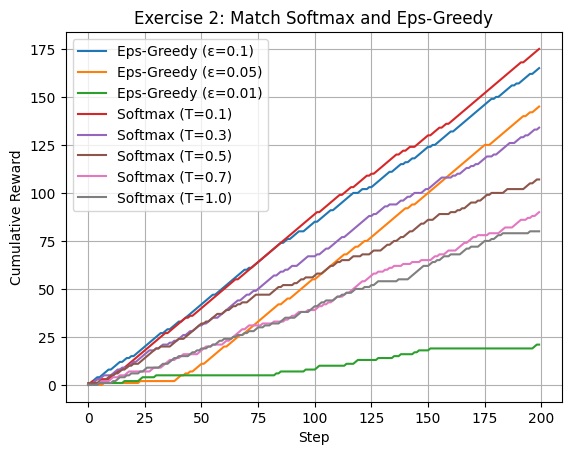

(<matplotlib.legend.Legend at 0x7ea0482946d0>, None, None)

In [2]:
# 위 클래스들 그대로 사용 가능
# epsilon vs temperature를 여러 조합으로 비교

arms = [BernoulliArm(mu) for mu in [0.1, 0.1, 0.1, 0.1, 0.9]]
horizon = 200

results = {}

# Epsilon-Greedy 여러 epsilon
for eps in [0.1, 0.05, 0.01]:
    label = f"Eps-Greedy (ε={eps})"
    rewards = run(EpsilonGreedy(eps), arms, horizon)
    results[label] = rewards

# Softmax 여러 temperature
for temp in [0.1, 0.3, 0.5, 0.7, 1.0]:
    label = f"Softmax (T={temp})"
    rewards = run(Softmax(temp), arms, horizon)
    results[label] = rewards

# 그래프
for label, rewards in results.items():
    plt.plot(rewards, label=label)
plt.title("Exercise 2: Match Softmax and Eps-Greedy")
plt.xlabel("Step"), plt.ylabel("Cumulative Reward")
plt.legend(), plt.grid(), plt.show()


<결과 해석>

Epsilon-Greedy (ε=0.1)과 Softmax  T=0.1 조합이 비교적 유사한 누적 보상 패턴을 보였다.

temperature가 1.0에 가까워질수록 Softmax는 탐색 중심으로 작동하며, 고보상 arm을 빠르게 탐지하지 못한다.

반대로 ε가 너무 작을 경우 탐색이 적어 초반에 잘못된 선택이 고착될 수 있다.

두 알고리즘은 근본적으로 선택 확률을 다르게 정의하기 때문에 완전히 동일한 행동을 보이도록 만드는 것은 어렵다.

# ✅ Exercise 3: Annealing temperature 방식 바꿔보기

<실험 목적>


Softmax의 temperature를 시간에 따라 다르게 감소시키는 전략이 성능에 어떤 영향을 주는지 실험한다.

<실험 조건>

Arms: [0.1, 0.1, 0.1, 0.1, 0.9]

<알고리즘>:

Custom Annealing Softmax: 첫 100회는 temperature = 0.5, 이후 100회는 temperature = 0.1

Standard Softmax: 고정 temperature = 1.0

Horizon: 200

Simulation: 1회 실행

<코드 설명>

CustomAnnealingSoftmax는 시간 단계(t)에 따라 temperature 값을 변경하는 방식으로 구현

Softmax (T=1.0)은 비교 기준용으로 고정된 탐색 중심 softmax

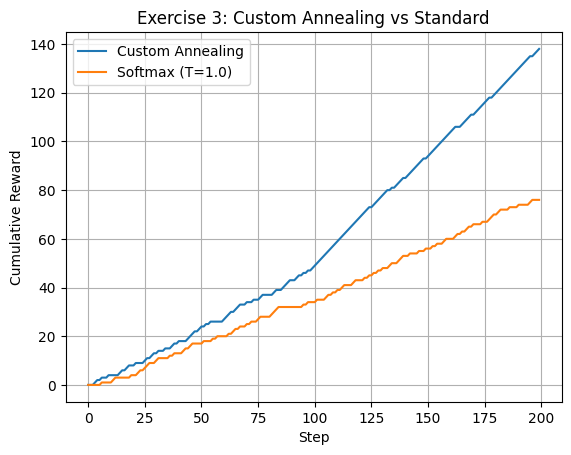

(<matplotlib.legend.Legend at 0x7ea0480bc6d0>, None, None)

In [3]:
class CustomAnnealingSoftmax:
    def initialize(self, n_arms):
        self.counts, self.values = [0]*n_arms, [0.0]*n_arms
    def select_arm(self):
        t = sum(self.counts) + 1
        temperature = 0.5 if t <= 100 else 0.1  # 온도 단계 조정
        z = sum([math.exp(v / temperature) for v in self.values])
        probs = [math.exp(v / temperature) / z for v in self.values]
        return np.random.choice(len(self.values), p=probs)
    def update(self, arm, reward):
        self.counts[arm] += 1
        n, value = self.counts[arm], self.values[arm]
        self.values[arm] += (reward - value) / n

arms = [BernoulliArm(mu) for mu in [0.1, 0.1, 0.1, 0.1, 0.9]]
horizon = 200

annealing = CustomAnnealingSoftmax()
standard = Softmax(temp=1.0)  # 참고용

results = {
    "Custom Annealing": run(annealing, arms, horizon),
    "Softmax (T=1.0)": run(standard, arms, horizon)
}

for label, rewards in results.items():
    plt.plot(rewards, label=label)
plt.title("Exercise 3: Custom Annealing vs Standard")
plt.xlabel("Step"), plt.ylabel("Cumulative Reward")
plt.legend(), plt.grid(), plt.show()


<결과 해석>

Custom Annealing Softmax는 초반 탐색 이후 후반에 exploitation에 집중할 수 있어 높은 누적 보상을 기록했다.

Standard Softmax는 temperature가 높아 계속해서 탐색적 선택을 반복하면서 고보상 arm에 집중하는 속도가 느렸다.

결론적으로 시간에 따라 temperature를 낮추는 방식은 더 효율적인 전략이 될 수 있다.